In [91]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [92]:
stock_id = "2330"
total_features_name = 'data/{}_Total_features.csv'.format(stock_id)

#處理重複欄位跟缺失值 以及過多缺失值的欄位
df = pd.read_csv(total_features_name, index_col='date')
df = df.drop(columns=['股價','借券賣出_當日調整'])
df = df.dropna()
df

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"20,001-30,000(股)","30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上"
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,240.0,240.0,240.0,238.0,23721.0,8659.0,5.681935e+09,2.74,0.5,19104797.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-08,242.0,242.0,242.5,240.5,21846.0,10251.0,5.281823e+09,2.13,2.0,17528008.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-09,242.0,242.0,242.0,239.5,19043.0,7124.0,4.588314e+09,2.67,0.0,13841045.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-10,241.5,236.5,242.0,236.0,25716.0,10534.0,6.118683e+09,2.44,-5.5,13967976.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-11,235.0,235.0,236.0,232.5,32070.0,9199.0,7.500674e+09,3.49,-1.5,19103515.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,506.0,505.0,508.0,503.0,38781.0,48051.0,1.957397e+10,0.81,5.0,31958707.0,...,0.70,0.46,0.34,1.03,1.05,1.25,0.87,0.82,0.77,85.78
2023-01-17,504.0,503.0,504.0,499.5,29443.0,27930.0,1.478466e+10,1.05,-2.0,21110197.0,...,0.70,0.46,0.34,1.03,1.05,1.25,0.87,0.82,0.77,85.78
2023-01-19,504.0,503.0,504.0,499.5,29443.0,27930.0,1.478466e+10,1.05,-2.0,21110197.0,...,0.68,0.45,0.34,1.02,1.04,1.25,0.90,0.80,0.74,86.05


In [93]:
# 三重障礙標籤
import myMethod

ret = myMethod.triple_barrier(df["收盤價"])

ret.to_csv("reet.csv")

In [94]:
df["標籤"] = ret["標籤"]

# 未標籤的資料進行刪除
df = df[:len(df)-14]
df

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上",標籤
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,240.0,240.0,240.0,238.0,23721.0,8659.0,5.681935e+09,2.74,0.5,19104797.0,...,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92,1
2018-01-08,242.0,242.0,242.5,240.5,21846.0,10251.0,5.281823e+09,2.13,2.0,17528008.0,...,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92,1
2018-01-09,242.0,242.0,242.0,239.5,19043.0,7124.0,4.588314e+09,2.67,0.0,13841045.0,...,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92,1
2018-01-10,241.5,236.5,242.0,236.0,25716.0,10534.0,6.118683e+09,2.44,-5.5,13967976.0,...,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92,1
2018-01-11,235.0,235.0,236.0,232.5,32070.0,9199.0,7.500674e+09,3.49,-1.5,19103515.0,...,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,458.0,457.0,462.5,457.0,10486.0,13482.0,4.820155e+09,0.78,0.5,5166242.0,...,0.46,0.34,1.03,1.05,1.24,0.89,0.80,0.78,85.69,1
2022-12-28,451.0,451.0,452.0,446.0,34823.0,59400.0,1.564327e+10,0.59,-6.0,6736524.0,...,0.46,0.34,1.03,1.05,1.24,0.89,0.80,0.78,85.69,1
2022-12-29,444.0,446.0,449.5,442.5,25596.0,34637.0,1.140028e+10,0.74,-5.0,13201405.0,...,0.46,0.34,1.03,1.05,1.24,0.89,0.80,0.78,85.69,1


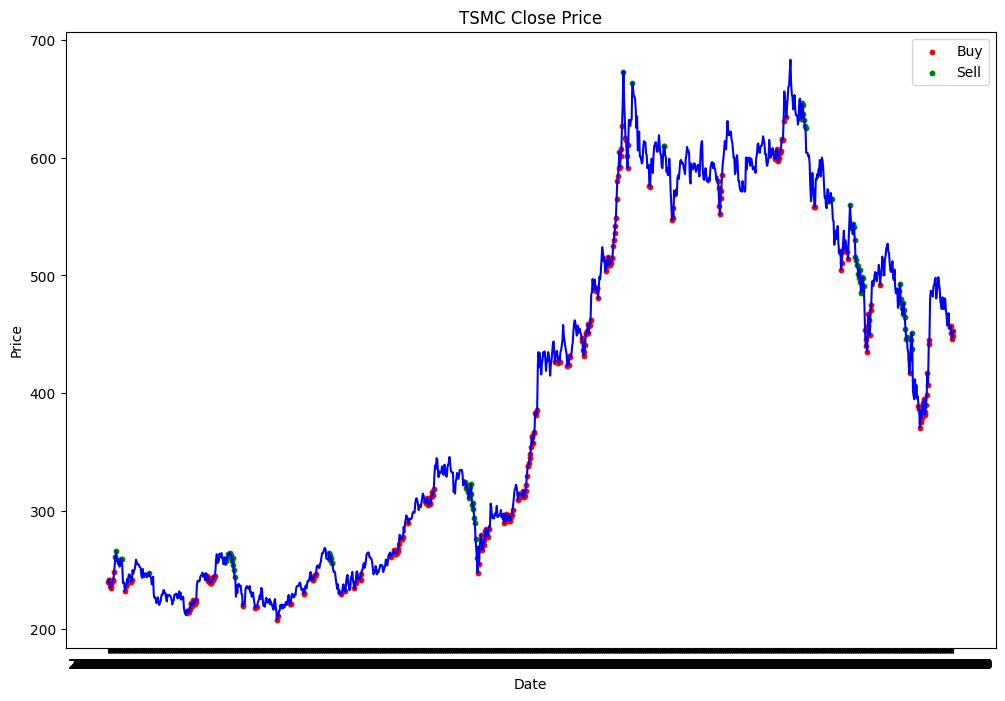

In [95]:
import matplotlib.pyplot as plt

closing_prices = df['收盤價']
labels = df['標籤']

fig, ax = plt.subplots(figsize=(12, 8))  # 设置图像尺寸为12x8英寸

ax.plot(closing_prices, color='blue')

buy_points = df.loc[df['標籤'] == 1]
sell_points = df.loc[df['標籤'] == -1]
ax.scatter(buy_points.index, buy_points['收盤價'], color='red', label='Buy', s=10)  # 将点的大小设置为20
ax.scatter(sell_points.index, sell_points['收盤價'], color='green', label='Sell', s=10)  # 将点的大小设置为20

ax.set_title('TSMC Close Price') 
ax.set_xlabel('Date')  
ax.set_ylabel('Price')  

ax.legend()
plt.show()


In [96]:
# 觀察結束的時間(最大持有時間)
start_dates = pd.Series(df.index, index=df.index)
end_dates = start_dates.iloc[15:].reset_index(drop=True)

start_dates = start_dates.iloc[:-15]

time_series = pd.Series(index=start_dates,data=end_dates.values)

In [97]:
from sklearn.preprocessing import MinMaxScaler

label = df['標籤']  

# 創建 MinMaxScaler
scaler = MinMaxScaler()

# 指定需要正規化的欄位（除了 標籤 欄位）
columns_to_normalize = df.columns.drop('標籤')

# 對欄位進行正規化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 正規化後的資料
df

C:\Users\Chiao\AppData\Local\Temp\ipykernel_768\1086025771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上",標籤
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,0.061181,0.067368,0.059811,0.066808,0.119356,0.021746,0.054955,0.254963,0.493333,0.177913,...,0.05,0.076923,0.028571,0.0,0.107143,0.16,0.05,0.571429,0.978626,1
2018-01-08,0.065401,0.071579,0.065058,0.072110,0.108232,0.027130,0.050363,0.191223,0.513333,0.163163,...,0.05,0.076923,0.028571,0.0,0.107143,0.16,0.05,0.571429,0.978626,1
2018-01-09,0.065401,0.071579,0.064008,0.069989,0.091603,0.016555,0.042404,0.247649,0.486667,0.128673,...,0.05,0.076923,0.028571,0.0,0.107143,0.16,0.05,0.571429,0.978626,1
2018-01-10,0.064346,0.060000,0.064008,0.062566,0.131192,0.028087,0.059968,0.223615,0.413333,0.129860,...,0.05,0.076923,0.028571,0.0,0.107143,0.16,0.05,0.571429,0.978626,1
2018-01-11,0.050633,0.056842,0.051417,0.055143,0.168889,0.023572,0.075829,0.333333,0.466667,0.177901,...,0.05,0.076923,0.028571,0.0,0.107143,0.16,0.05,0.571429,0.978626,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.521097,0.524211,0.526758,0.531283,0.040836,0.038057,0.045065,0.050157,0.493333,0.047524,...,0.95,0.923077,0.971429,1.0,0.714286,0.64,0.75,1.000000,0.027481,1
2022-12-28,0.506329,0.511579,0.504722,0.507953,0.185223,0.193349,0.169283,0.030303,0.406667,0.062213,...,0.95,0.923077,0.971429,1.0,0.714286,0.64,0.75,1.000000,0.027481,1
2022-12-29,0.491561,0.501053,0.499475,0.500530,0.130480,0.109602,0.120586,0.045977,0.420000,0.122689,...,0.95,0.923077,0.971429,1.0,0.714286,0.64,0.75,1.000000,0.027481,1


In [98]:
#分割訓練集
train_size = int(len(df) * 0.7)
train_set = df[:train_size]
val_set = df[train_size:]

print("train size :"+str(len(train_set))+" "+"val size:"+str(len(val_set)))

train size :865 val size:371


In [99]:
# 技術面指標
tech_train_set = train_set[['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅']]
tech_val_set = val_set[['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅']]
# 籌碼面
chip_train_set = train_set.drop(columns=['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅'])
chip_val_set = val_set.drop(columns=['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅'])

## Feature Selection

In [100]:
# RF MDI 尋找籌碼面的特徵重要性
from sklearn.ensemble import RandomForestClassifier

X_train = chip_train_set.drop('標籤',axis=1)
y_train = chip_train_set['標籤']
X_val = chip_val_set.drop('標籤',axis=1)
y_val = chip_val_set['標籤']

rf = RandomForestClassifier(n_estimators=1000, max_features=1 ,n_jobs=-1,bootstrap=False)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=1, n_estimators=1000,
                       n_jobs=-1)

In [101]:
feature_names = X_train.columns

# 計算特徵重要性
importances = myMethod.featImpMDI(rf, feature_names)

importances = importances.sort_values('mean',ascending=False)

# 抓前10個特徵
importances = importances.head(10)
importances

,mean,std
累計_賣出_外陸資賣出股數(不含外資自營商),0.022178,0.000619
累計_買進_投信買進股數,0.022114,0.000609
累計_融券_融券買進(張),0.022087,0.000606
累計_借券賣出_當日賣出,0.022077,0.000595
累計_融資_融資賣出(張),0.021979,0.000584
累計_賣出_自營商賣出股數(自行買賣+避險),0.021930,0.000585
累計_融資_融資買進(張),0.021898,0.000584
累計_賣出_投信賣出股數,0.021816,0.000593
累計_投信買賣超股數,0.021785,0.000583
累計_買進_外陸資買進股數(不含外資自營商),0.021733,0.000570


In [102]:
new_train_set = pd.concat([tech_train_set, chip_train_set[importances.index]], axis=1)

new_val_set = pd.concat([tech_val_set,chip_val_set[importances.index]],axis=1)

new_train_set['標籤'] = train_set['標籤']
new_val_set['標籤'] = val_set['標籤']

new_train_set

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,累計_賣出_外陸資賣出股數(不含外資自營商),累計_買進_投信買進股數,累計_融券_融券買進(張),累計_借券賣出_當日賣出,累計_融資_融資賣出(張),累計_賣出_自營商賣出股數(自行買賣+避險),累計_融資_融資買進(張),累計_賣出_投信賣出股數,累計_投信買賣超股數,累計_買進_外陸資買進股數(不含外資自營商),標籤
date,,,,,,,,,,,,,,,,,,,,
2018-01-05,0.061181,0.067368,0.059811,0.066808,0.119356,0.021746,0.054955,0.254963,0.493333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168621,0.000000,1
2018-01-08,0.065401,0.071579,0.065058,0.072110,0.108232,0.027130,0.050363,0.191223,0.513333,0.000255,0.000387,0.000252,0.000038,0.000231,0.000044,0.000153,0.000042,0.169763,0.000661,1
2018-01-09,0.065401,0.071579,0.064008,0.069989,0.091603,0.016555,0.042404,0.247649,0.486667,0.000685,0.001422,0.000434,0.000131,0.000409,0.000219,0.000227,0.000042,0.173080,0.001184,1
2018-01-10,0.064346,0.060000,0.064008,0.062566,0.131192,0.028087,0.059968,0.223615,0.413333,0.001215,0.002682,0.002763,0.000163,0.000520,0.001088,0.000737,0.000282,0.176552,0.001711,1
2018-01-11,0.050633,0.056842,0.051417,0.055143,0.168889,0.023572,0.075829,0.333333,0.466667,0.002134,0.002781,0.004287,0.000234,0.000598,0.001343,0.000989,0.000960,0.175256,0.002431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,0.795359,0.806316,0.809024,0.809120,0.158234,0.066310,0.195840,0.113898,0.526667,0.725719,0.587208,0.816842,0.715874,0.708384,0.722612,0.713653,0.717272,0.346371,0.739738,0
2021-07-06,0.810127,0.808421,0.806925,0.811241,0.060675,0.045731,0.083685,0.060606,0.500000,0.726001,0.587308,0.816870,0.715881,0.709007,0.722995,0.713939,0.718603,0.343529,0.740039,0
2021-07-07,0.799578,0.812632,0.802728,0.809120,0.081434,0.053414,0.107388,0.068966,0.513333,0.726339,0.587330,0.816926,0.716580,0.709722,0.723410,0.714289,0.720634,0.338769,0.740484,0


## Model

In [103]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [104]:
# 設定gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [105]:
class LSTMModle(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModle, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 3) # 分類
        self.fc2 = nn.Linear(hidden_size, 1) # 價格  

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, (h_n, c_n) = self.lstm(x, (h0, c0))
        class_output = self.fc1(h_n[-1])
        price_output = self.fc2(out[:, -1, :])

        return class_output, price_output 

In [106]:
new_train_set
new_train_set_X = new_train_set.loc[:, ~new_train_set.columns.isin(['收盤價', '標籤'])].values
new_train_set_label_y = new_train_set.loc[:, '標籤'].values
new_train_set_price_y = new_train_set.loc[:, ['收盤價']].values

new_train_set_label_y = new_train_set_label_y +1 # 多分類任務，可以將標籤轉換為從0開始的索引形式。在這種情況下，需要將標籤從-1、0和1轉換為0、1和2
# new_train_set_label_y


In [107]:
tensor_X_train = torch.tensor(new_train_set_X, dtype=torch.float).unsqueeze(1) # [865, 1, 18]
tensor_lable_y_train = torch.tensor(new_train_set_label_y, dtype=torch.long) # [865]
tensor_price_y_train = torch.tensor(new_train_set_price_y, dtype=torch.float) # [865, 1]

# tensor_label_y_train.shape

In [108]:
input_size = tensor_X_train.shape[2]  # 輸入特徵的數量
param_grid = {
    'hidden_size': [64, 128, 256], # LSTM的隱藏層大小
    'num_layers': [1, 2, 3], # LSTM的層數
    'num_epochs': [100, 500, 1000],  # 訓練的迭代次數 
    'batch_size':[50, 100, 150], # 每個訓練批次的樣本數
    'learning_rate': [0.001, 0.01, 0.1] # 學習率
}

In [109]:
def train(model, criterion_class, criterion_price, optimizer, dataloader, num_epochs):
    model.train()

    losses = []

    for epoch in range(num_epochs):  # epochs
        total_loss = 0.0
        for inputs, labels, price in dataloader:  # batch
            optimizer.zero_grad() # 梯度歸0
            label_outputs, price_outputs = model(inputs) # 前向傳播
            label_loss = criterion_class(label_outputs, labels) # 計算損失
            price_loss = criterion_price(price_outputs, price) # 計算損失
            loss = label_loss + price_loss
            loss.backward() # 計算梯度
            optimizer.step() # 根據梯度更新模型參數
            total_loss += loss.item()
        
        # 計算每個 epoch 的平均損失
        avg_loss = total_loss / len(dataloader)
        losses.append(avg_loss)
        
        # 一個epoch的平均損失
        # print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, avg_loss))

In [110]:
def evaluate(model, criterion_class, criterion_price, dataloader):
    model.eval()  # 切換到評估模式

    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels, price in dataloader:
            label_outputs, price_outputs = model(inputs)
            label_loss = criterion_class(label_outputs, labels)
            price_loss = criterion_price(price_outputs, price)
            loss = label_loss + price_loss
            total_loss += loss.item()

            _, predicted = torch.max(label_outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    average_loss = total_loss / len(dataloader)

    return accuracy, average_loss


In [111]:
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold


k = 5
kfold = KFold(n_splits=k, shuffle=True)

def train_with_parameter_search(param_grid, tensor_X_train, tensor_lable_y_train, tensor_price_y_train):
    best_performance = 0.0
    best_model = None
    best_params = None

    for i, params in enumerate(ParameterGrid(param_grid)):
        # 初始化性能指標列表
        performances_accuracy = []
        params_loss = []

        # 歷遍每个折
        kfold_splits = list(kfold.split(tensor_X_train))
        for j, (train_indices, val_indices) in enumerate(kfold_splits):
            # 根據fold拆分成訓練和驗證數據
            X_train_fold = tensor_X_train[train_indices]
            label_y_train_fold = tensor_lable_y_train[train_indices]
            price_y_train_fold = tensor_price_y_train[train_indices]

            X_val_fold = tensor_X_train[val_indices]
            label_y_val_fold = tensor_lable_y_train[val_indices]
            price_y_val_fold = tensor_price_y_train[val_indices]
            
            X_train_fold = X_train_fold.to(device)
            label_y_train_fold = label_y_train_fold.to(device)
            price_y_train_fold = price_y_train_fold.to(device)

            X_val_fold = X_val_fold.to(device)
            label_y_val_fold = label_y_val_fold.to(device)
            price_y_val_fold = price_y_val_fold.to(device)

            # 建立訓練集和驗證集的 DataLoader
            train_dataset = TensorDataset(X_train_fold, label_y_train_fold, price_y_train_fold)
            train_dataloader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)

            val_dataset = TensorDataset(X_val_fold, label_y_val_fold, price_y_val_fold)
            val_dataloader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=True)

            # 建立模型
            model = LSTMModle(input_size, params['hidden_size'], params['num_layers'])
            model = model.to(device)

            # 定義損失函數和優化器
            criterion_class = nn.CrossEntropyLoss() # loss function
            criterion_price = nn.MSELoss() # loss function
            optimizer = optim.Adam(model.parameters(), lr=params['learning_rate']) # 優化器 

            # 訓練模型
            train(model, criterion_class, criterion_price, optimizer, train_dataloader, params['num_epochs'])

            # 在驗證集上評估模型性能
            accuracy, loss = evaluate(model, criterion_class, criterion_price, val_dataloader)

            # 紀錄性能指標
            performances_accuracy.append(accuracy)
            params_loss.append(loss)

        # 計算平均性能指標
        mean_performance = sum(performances_accuracy) / len(performances_accuracy)
        mean_params_loss = sum(params_loss) / len(params_loss)

        print('params [{}/{}], Accuracy: {:.4f}, Loss: {:.4f}'.format(i+1, len(ParameterGrid(param_grid)), mean_performance, mean_params_loss))

        # 判斷是否為最佳模型
        if mean_performance > best_performance:
            best_performance = mean_performance
            best_model = model
            best_params = params

    print("Best Model Performance (accuracy):", best_performance)
    print("Best Model Parameters:", best_params)

    return best_model, best_params


In [112]:
# 如果要使用 k-fold 找最佳參數時 使用這個 function 不使用則關閉
# best_model, best_params = train_with_parameter_search(param_grid, tensor_X_train, tensor_lable_y_train, tensor_price_y_train)

In [113]:
# 使用最佳參數重新train
input_size = tensor_X_train.shape[2]
batch_size = 150  # best_params['batch_size']  # 50
hidden_size = 128  # best_params['hidden_size'] # 64
learning_rate = 0.001  # best_params['learning_rate'] # 0.001
num_epochs = 1000  # best_params['num_epochs'] # 1000
num_layers = 3  # best_params['num_layers'] # 3

In [114]:
# 轉到GPU上
tensor_X_train = tensor_X_train.to(device)
tensor_lable_y_train = tensor_lable_y_train.to(device)
tensor_price_y_train = tensor_price_y_train.to(device)

In [115]:
from torch.utils.data import DataLoader, TensorDataset
# 訓練集的 DataLoader
train_dataset = TensorDataset(tensor_X_train, tensor_lable_y_train, tensor_price_y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [116]:
# 建立模型
train_set_model = LSTMModle(input_size, hidden_size, num_layers)
train_set_model = train_set_model.to(device)

In [117]:
# 定義損失函數和優化器
criterion_class = nn.CrossEntropyLoss() # loss function
criterion_price = nn.MSELoss() # loss function
optimizer = optim.Adam(train_set_model.parameters(), lr=learning_rate) # 優化器 

In [118]:
def all_train_set_train(model, criterion_class, criterion_price, optimizer, dataloader, num_epochs):
    model.train()

    losses = []
    accuracies = []

    for epoch in range(num_epochs):  # epochs
        total_loss = 0.0
        correct = 0  # 跟蹤預測正確的樣本數量
        total = 0  # 跟蹤處理的總樣本數量
        
        for inputs, labels, price in dataloader:  # batch
            optimizer.zero_grad() # 梯度歸0
            label_outputs, price_outputs = model(inputs) # 前向傳播
            label_loss = criterion_class(label_outputs, labels) # 計算損失
            price_loss = criterion_price(price_outputs, price) # 計算損失
            loss = label_loss + price_loss
            loss.backward() # 計算梯度
            optimizer.step() # 根據梯度更新模型參數
            total_loss += loss.item()

            _, predicted = torch.max(label_outputs.data, 1)
            total += labels.size(0)  # 了當前批次中的樣本數量，並將其累加到total變量中，以便後續計算總樣本數量。
            correct += (predicted == labels).sum().item()  # 計算了預測正確的樣本數量，並將其累加到correct變數中。
        
        # 計算每個 epoch 的平均損失
        avg_loss = total_loss / len(dataloader)
        losses.append(avg_loss)

        accuracy = correct / total
        accuracies.append(accuracy)

        
        if (epoch+1) % 100 == 0: # 100次epoch印一次
        # 一個epoch的平均損失
            print('Epoch [{}/{}], Accuracy: {:.4f}, Loss: {:.4f}'.format(epoch+1, num_epochs, accuracy, avg_loss))

    # 繪製損失變化折線圖
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(losses)

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(accuracies)

    plt.tight_layout()
    plt.show()

Epoch [100/1000], Accuracy: 0.7260, Loss: 0.6925
Epoch [200/1000], Accuracy: 0.7249, Loss: 0.5986
Epoch [300/1000], Accuracy: 0.8081, Loss: 0.4638
Epoch [400/1000], Accuracy: 0.8509, Loss: 0.3772
Epoch [500/1000], Accuracy: 0.8809, Loss: 0.3068
Epoch [600/1000], Accuracy: 0.8902, Loss: 0.2589
Epoch [700/1000], Accuracy: 0.9202, Loss: 0.2144
Epoch [800/1000], Accuracy: 0.9468, Loss: 0.1682
Epoch [900/1000], Accuracy: 0.9503, Loss: 0.1486
Epoch [1000/1000], Accuracy: 0.9514, Loss: 0.1314


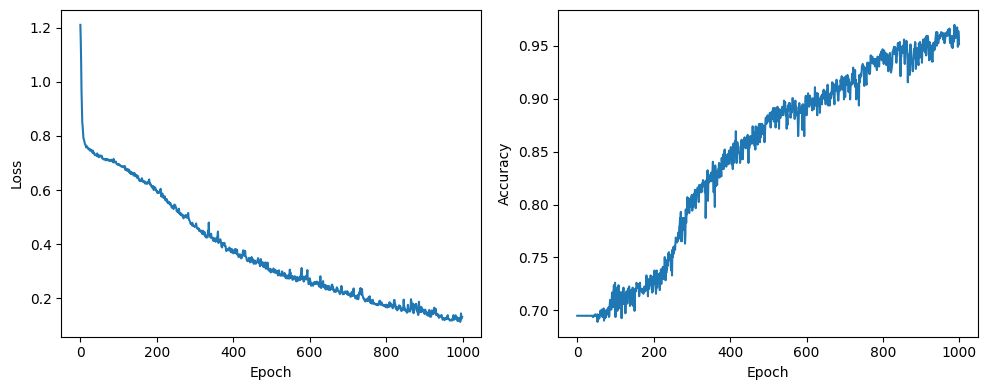

In [119]:
# 訓練模型
all_train_set_train(train_set_model, criterion_class, criterion_price, optimizer, train_dataloader, num_epochs)

In [125]:
# 使用best_model跑 new_val_set
new_val_set
new_val_set_X = new_val_set.loc[:, ~new_val_set.columns.isin(['收盤價', '標籤'])].values
new_val_set_label_y = new_val_set.loc[:, '標籤'].values
new_val_set_price_y = new_val_set.loc[:, ['收盤價']].values

new_val_set_label_y = new_val_set_label_y +1 # 多分類任務，可以將標籤轉換為從0開始的索引形式。在這種情況下，需要將標籤從-1、0和1轉換為0、1和2
# new_val_set_label_y

In [126]:
tensor_X_val = torch.tensor(new_val_set_X, dtype=torch.float).unsqueeze(1) # [371, 1, 18]
tensor_lable_y_val = torch.tensor(new_val_set_label_y, dtype=torch.long) # [371]
tensor_price_y_val = torch.tensor(new_val_set_price_y, dtype=torch.float) # [371, 1]

tensor_X_val.shape

torch.Size([371, 1, 18])

In [127]:
def val(model, X_val, label_y_val, price_y_val):
    model.eval()
    
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        label_outputs, price_outputs = model(X_val)
        label_loss = criterion_class(label_outputs, label_y_val)
        price_loss = criterion_price(price_outputs, price_y_val)
        loss = label_loss + price_loss
        total_loss += loss.item()

        _, predicted = torch.max(label_outputs.data, 1)
        total += label_y_val.size(0)
        correct += (predicted == label_y_val).sum().item()

    accuracy = correct / total
    average_loss = total_loss / len(price_y_val)

    return accuracy, average_loss

In [128]:
tensor_X_val = tensor_X_val.to(device)
tensor_lable_y_val = tensor_lable_y_val.to(device)
tensor_price_y_val = tensor_price_y_val.to(device)
# best_model = best_model.to(device)
train_set_model = train_set_model.to(device)

tensor_price_y_val.shape

torch.Size([371, 1])

In [129]:
# 要使用 k-fold 跑出的 model 使用 best_model
# 要使用最佳參數重新 train 跑出的 modle 使用 train_set_model

accuracy, average_loss = val(train_set_model, tensor_X_val, tensor_lable_y_val, tensor_price_y_val)

print('model 預測 new_val_set: Accuracy: {}, Average_Loss: {}'.format(accuracy, average_loss))

model 預測 new_val_set: Accuracy: 0.7493261455525606, Average_Loss: 0.009460722339763795


In [131]:
torch.save(train_set_model,'model.pth')

In [133]:
model = torch.load('model.pth')
model

LSTMModle(
  (lstm): LSTM(18, 128, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=128, out_features=3, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)